In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE

from tensorflow.keras import regularizers

###
import tensorflow.keras.utils as ku 
import numpy as np 

In [5]:
tokenizer = Tokenizer()
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#    -O ./tmp/sonnets.txt
data = open('./tmp/nlp_w4/sonnets.txt', encoding="utf8").read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [7]:
 history = model.fit(predictors, label, epochs=200, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 8s 549us/sample - loss: 6.9131 - accuracy: 0.0223
Epoch 2/100
15462/15462 [==============================] - 4s 284us/sample - loss: 6.5024 - accuracy: 0.0235
Epoch 3/100
15462/15462 [==============================] - 4s 280us/sample - loss: 6.3918 - accuracy: 0.0270
Epoch 4/100
15462/15462 [==============================] - 4s 283us/sample - loss: 6.2675 - accuracy: 0.0301
Epoch 5/100
15462/15462 [==============================] - 4s 278us/sample - loss: 6.1783 - accuracy: 0.0360
Epoch 6/100
15462/15462 [==============================] - 4s 276us/sample - loss: 6.1009 - accuracy: 0.0383
Epoch 7/100
15462/15462 [==============================] - 4s 277us/sample - loss: 6.0294 - accuracy: 0.0389
Epoch 8/100
15462/15462 [==============================] - 4s 277us/sample - loss: 5.9505 - accuracy: 0.0453
Epoch 9/100
15462/15462 [==============================] - 4s 287us/sample - loss: 5.8552 - accuracy: 0.0

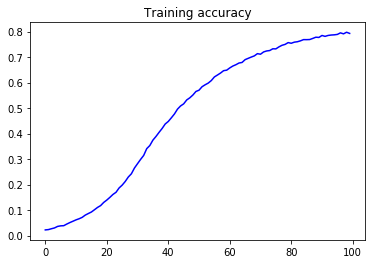

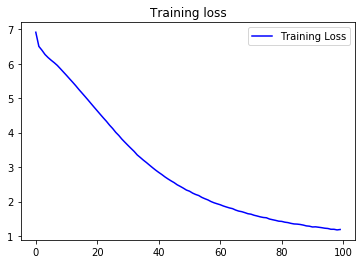

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [10]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope well on thy heart esteem show every breast new hate hate new new new hate new new sit far on hell he happy live so glory so speed best bright bright rage best sits flow weeds age sang cold ocean hath flatter not bright dearer fired flow gone days ' on thee young days look what such praise live bright still bright new bright new dearer chary deem'd torn bright up new hate hate show behind bright new new ' should call so far confounds told disgrace to store not live kind alone so much acquainted live alone should change
